In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [128]:
dx=pd.read_csv('000.datasets/006.weightedX.csv')
dy=pd.read_csv('000.datasets/007.weightedY.csv')

In [129]:
X=dx.values
Y=dy.values

In [130]:
print(X.shape,Y.shape)

(99, 1) (99, 1)


C:\Users\Aditya bansal\AppData\Local\Temp\ipykernel_29048\128854626.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


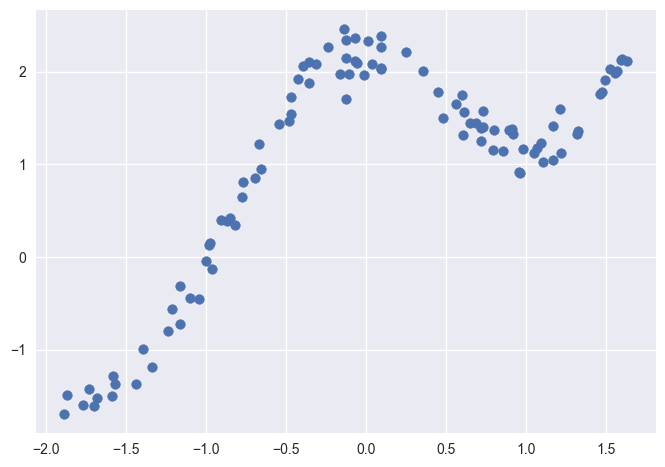

In [131]:
plt.style.use("seaborn")
std=X.std()
u=X.mean()
X=(X-u)/std
plt.scatter(X,Y)
plt.show()

In [132]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [133]:
def getW(x,X,tau):
    m=X.shape[0]
    W=np.mat(np.eye(m))
    for i in range(m):
        W[i,i]=np.exp(np.dot((X[i]-x),(X[i]-x).T)/(-2*tau*tau))
    return W

In [134]:
X=np.mat(X)
Y=np.mat(Y)
M=X.shape[0]
W=getW(-1,X,100)
print(W)

[[0.99997933 0.         0.         ... 0.         0.         0.        ]
 [0.         0.99999834 0.         ... 0.         0.         0.        ]
 [0.         0.         0.99997917 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.99994881 0.         0.        ]
 [0.         0.         0.         ... 0.         0.99987121 0.        ]
 [0.         0.         0.         ... 0.         0.         0.99975348]]


In [135]:
def predict(X,Y,query_x,tau):
    ones=np.ones((M,1))
    X_=np.hstack((X,ones))
    qx=np.mat([query_x,1])
    W=getW(qx,X_,tau)
    theta= np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    pred=np.dot(qx,theta)
    return theta,pred
    

In [136]:

theta,pred=predict(X,Y,1.0,1.0)
print(theta)
print(pred)

[[0.14069504]
 [1.45348191]]
[[1.59417694]]


In [147]:
def plotpred(tau):
    X_test=np.linspace(-2,2,20)
    Y_=[]
    for q in X_test:
        t,y=predict(X,Y,q,tau)
        Y_.append(y[0][0])
        
    Xo=np.array(X)
    Yo=np.array(Y)
    
    Y_=np.array(Y_)
    plt.scatter(Xo,Yo)
    plt.scatter(X_test,Y_,color='red')
    plt.show()
    return

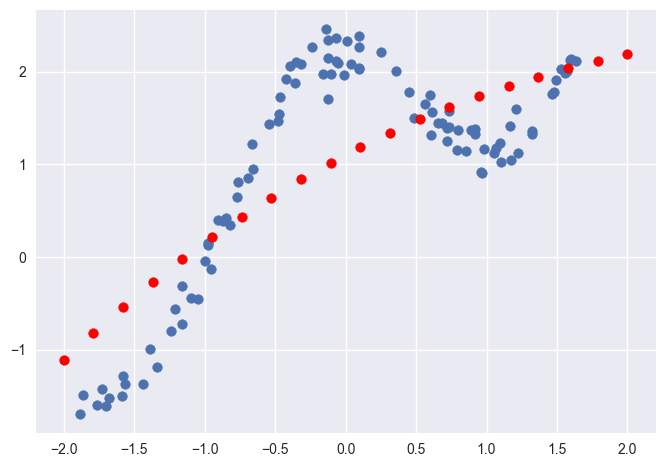

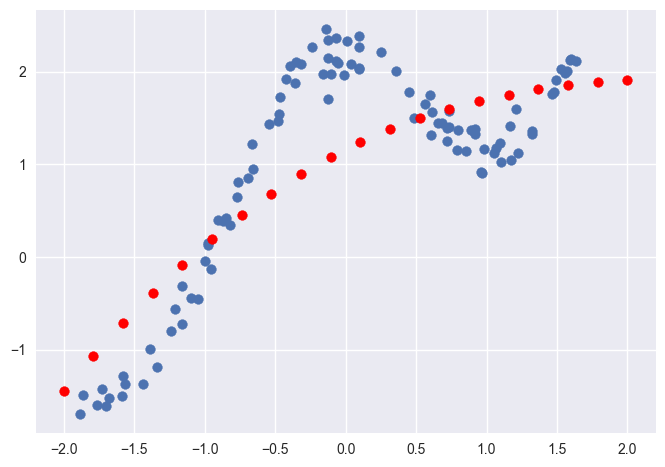

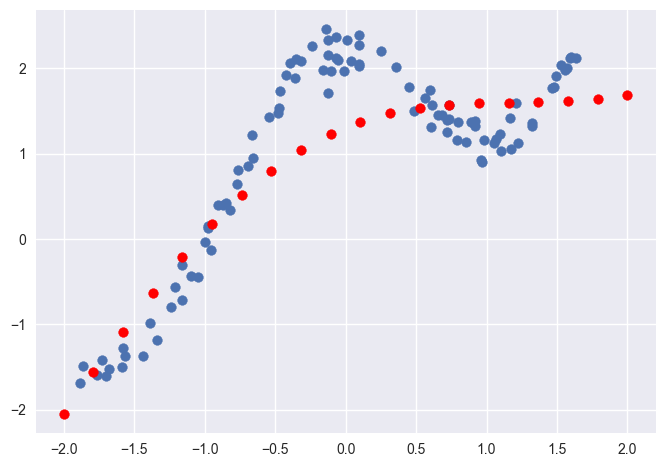

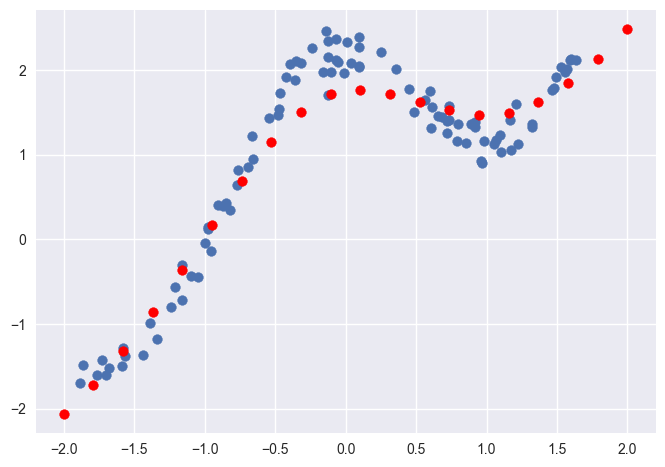

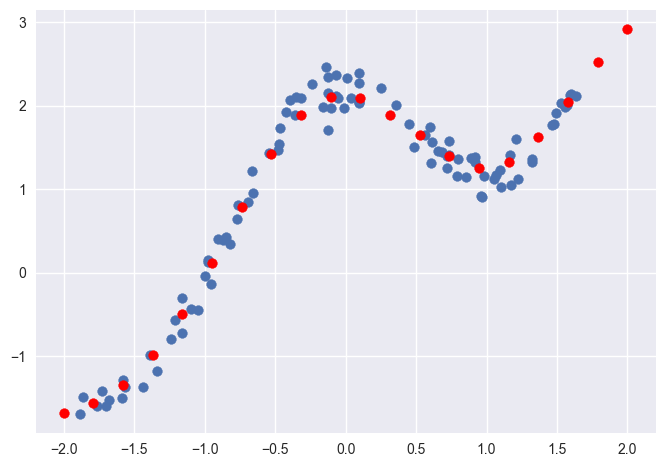

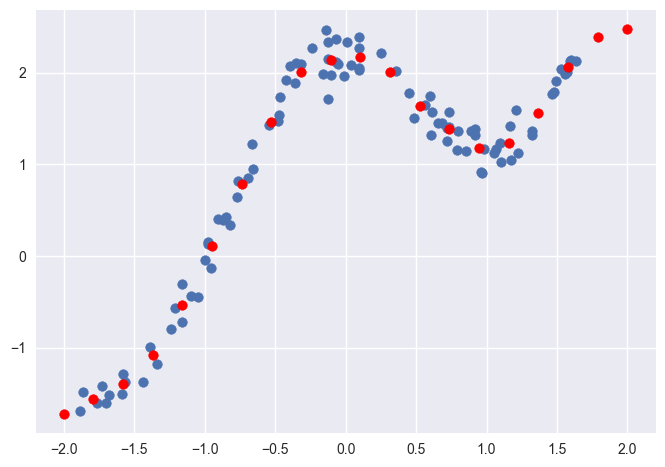

In [148]:
tau=[2,1.5,1,0.5,0.2,0.1]
for i in tau:
    plotpred(i)